In [1]:
import numpy as np
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D

C:\Users\sreel\anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

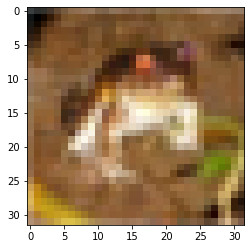

In [7]:
plt.imshow(X_train[0])

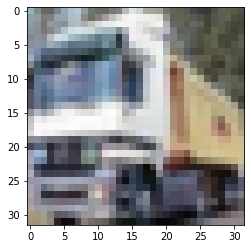

In [8]:
plt.imshow(X_train[1])

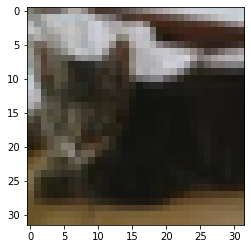

In [9]:
plt.imshow(X_train[9])

In [10]:
classes = ["airplane", "automobile", "bird","cat","deer", "dog", "frog", "horse" "ship", "truck"]

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)

In [13]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [14]:
classes[0]

'airplane'

In [15]:
def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

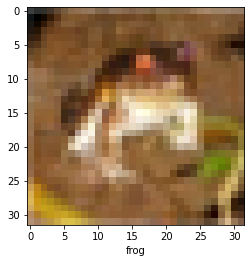

In [16]:
plot_sample(X_train, y_train, 0)

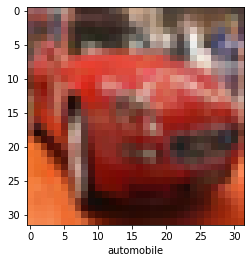

In [17]:
plot_sample(X_train, y_train, 5)

In [18]:
#normalize the dataset by dividing the values with 255

X_train = X_train / 255
X_test = X_test / 255

In [19]:
from keras.models import Sequential

In [20]:
cnn = models.Sequential([
    
      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
    
      layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
    
    
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
    ])

In [21]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15


1563/1563 [==============================] - 21s 12ms/step - loss: 1.5071 - accuracy: 0.4610
Epoch 2/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1473 - accuracy: 0.5975
Epoch 3/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0073 - accuracy: 0.6476
Epoch 4/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9252 - accuracy: 0.6787
Epoch 5/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8489 - accuracy: 0.7062
Epoch 6/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7937 - accuracy: 0.7246
Epoch 7/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7521 - accuracy: 0.7394
Epoch 8/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7087 - accuracy: 0.7524
Epoch 9/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6725 - accuracy: 0.7659
Epoch 10/15
1563/1563 [==============================] - 18s 1

In [23]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0109 - accuracy: 0.6918


[1.010867714881897, 0.6917999982833862]

In [24]:
y_test= y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

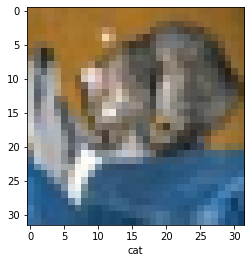

In [25]:
plot_sample(X_test, y_test, 0)

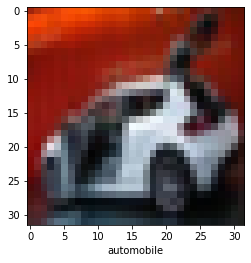

In [26]:
plot_sample(X_test, y_test, 6)

In [32]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [35]:
classes[y_classes[1]]

'truck'

In [36]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1000
           1       0.87      0.73      0.79      1000
           2       0.63      0.53      0.58      1000
           3       0.52      0.49      0.51      1000
           4       0.60      0.73      0.66      1000
           5       0.59      0.63      0.61      1000
           6       0.79      0.73      0.76      1000
           7       0.75      0.76      0.75      1000
           8       0.76      0.83      0.79      1000
           9       0.68      0.85      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

